# Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 6 + z ** 3 - 1

def df(z):
    return 6 * z ** 5 + 3 * z ** 2

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex( ((-1+math.sqrt(5))/2)**(1/3) , 0)
    r2 = complex( -(2**(2/3)*(-1+math.sqrt(5))**(1/3))/4, (2**(2/3)*math.sqrt(3)*(-1+math.sqrt(5))**(1/3))/4 )
    r3 = complex( -(2**(2/3)*(-1+math.sqrt(5))**(1/3))/4, -(2**(2/3)*math.sqrt(3)*(-1+math.sqrt(5))**(1/3))/4 )
    r4 = complex( ((-1-math.sqrt(5))/2)**(1/3) , 0)
    r5 = complex( -(2**(2/3)*(-1-math.sqrt(5))**(1/3))/4, (2**(2/3)*math.sqrt(3)*(-1-math.sqrt(5))**(1/3))/4 )
    r6 = complex( -(2**(2/3)*(-1-math.sqrt(5))**(1/3))/4, -(2**(2/3)*math.sqrt(3)*(-1-math.sqrt(5))**(1/3))/4 )


    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<=eps:
                    # color yellow
                    pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 0)
                elif abs(z-r5)<=eps:
                    # color cyan
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 255 - count*multcol)
                elif abs(z-r6)<=eps:
                    # color magenta
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z) = z**6 + z**3 - 1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

## Plot of f(z)= z\*\*6 + z\*\*3 - 1 for the reals f(x) = x\*\*6 + x\*\*3 - 1

Text(0, 0.5, 'f(x)')

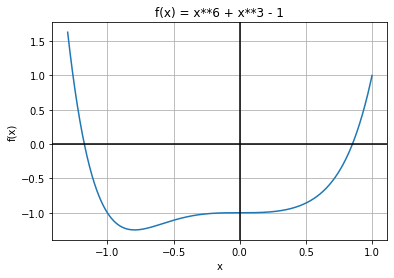

In [2]:
x = np.linspace(-1.3,1,1000)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x) = x**6 + x**3 - 1')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


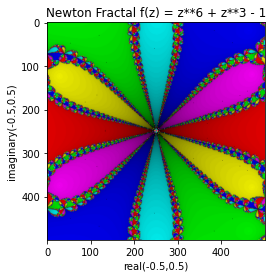

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


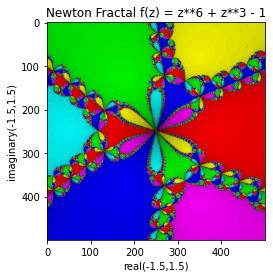

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


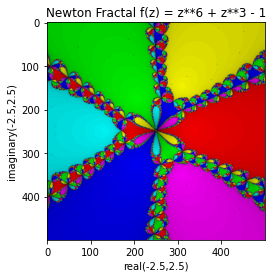

In [3]:
print("zoom out")
display1(zoom=1)
display1(zoom=3)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


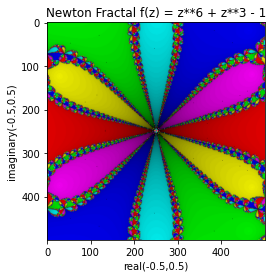

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


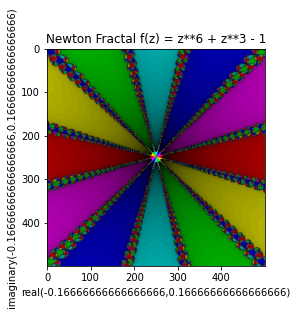

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


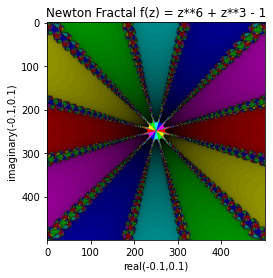

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


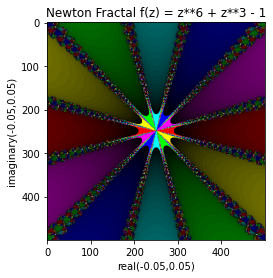

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


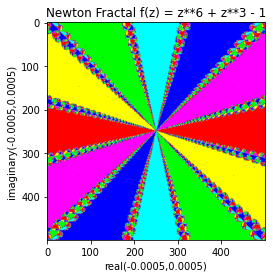

In [4]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/3)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/1000)

## Newton iterates form z = 10.0 + 0.0j

A continuación se utiliza el método de Newton con el fin de hallar las raices del polinomio. Este método toma un valor inicial sobre el cual se itera un número determinado de veces, dada una sucesión, que al paso de cada iteración puede converger a un valor determinado. En este caso se busca que coverja a alguna raiz del polinomio y para alcanzar esta covergencia lo ideal es seleccionar un valor inicial lo suficientemente cercano a la raiz buscada.

Veamos que para un valor de z = 10 + 0j, las iteraciones se acercan a una de las raices del polinomio, r1 = 0.85179. Lo anterior, se debe a que se tomó un valor de z positivo en la parte real y 0 en la parte imaginaria, tal y como se describe r1. 

0.851799642079243   0.0


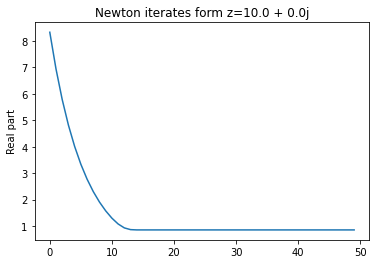

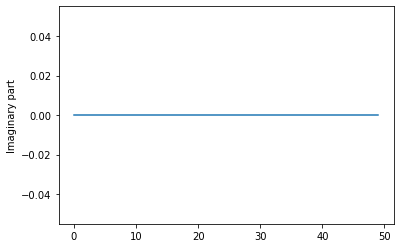

In [5]:
''' 
roots
r1 = 0.85179
r2 = -0.42589 + i*0.73768
r3 = -0.42589 - i*0.73768
r4 = -1.17398
r5 = 0.58699 - i*1.01669
r6 = 0.58699 + i*1.01669
'''

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print(r[-1], ' ',i[-1]) # raiz 1 
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z = -10.0 + 10.0j

Para un segundo valor de z = -10 + 10j, veamos que converge a la raiz r2 = -0.42589 + i*0.73768, que al igual que en el caso anterior describe a r2, con valor real negativo y valor imaginario positivo.

-0.42589982103962154   0.7376801289751167


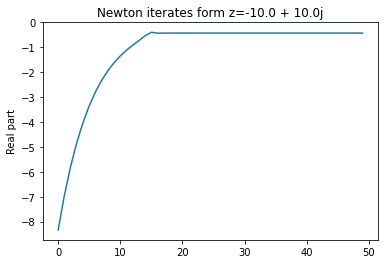

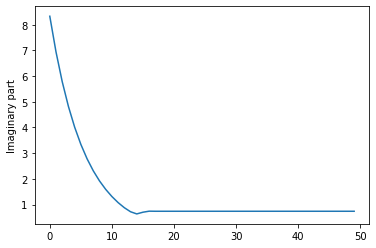

In [6]:
z=-10.0 +10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print(r[-1], ' ',i[-1]) # raiz 2
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z = -10.0 -10.0j

En este y los siguientes valores ocurre de la misma manera. La idea general es escoger un valor de z tal que describa una de las raices del polinomio, en este caso queremos la raiz r3 = -0.42589 - i*0.73768, luego tomamos un valor negativo en los reales y un valor negativo en los imaginarios. Aunque se puede tomar cualquier valor, entre más cercano sea este a la raiz, más rápido converge al valor que se busca.

-0.42589982103962154   -0.7376801289751167


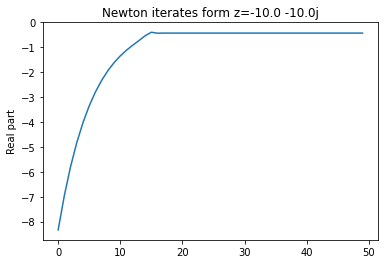

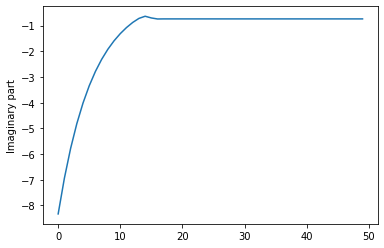

In [7]:
z=-10.0 -10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print(r[-1], ' ',i[-1]) # raiz 3 
plt.title('Newton iterates form z=-10.0 -10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z = -10.0 + 0.0j

Como última anotación, note el comportamiento de la sucesión a medida que aumenta el número de iteración. Se comienza la primera iteración con el valor inicial dado y a medida que se itera, se acerca a un cierto valor, en este caso al de una de las raices del polinomio. Cabe resaltar que estas iteraciones no necesariamente convergen a un valor específico, este puede ser divergente, sin embargo en este caso, se tomaron valores adecuados para que esto no sucediese y se aproximara lo mejor posible a los valores de las raices.

-1.1739849967053284   0.0


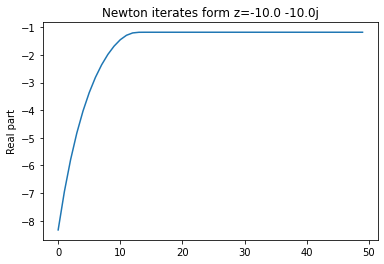

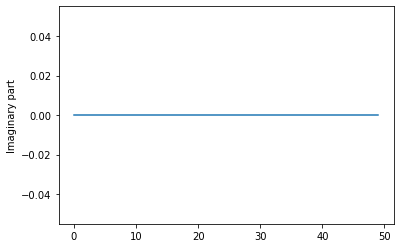

In [8]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print(r[-1], ' ',i[-1]) # raiz 4
plt.title('Newton iterates form z=-10.0 -10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z = 10.0 - 10.0j

0.5869924983526643   -1.016700830808605


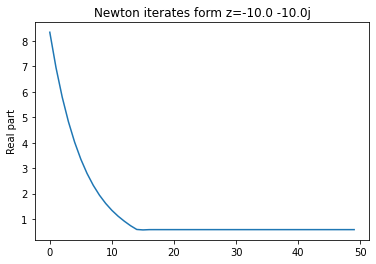

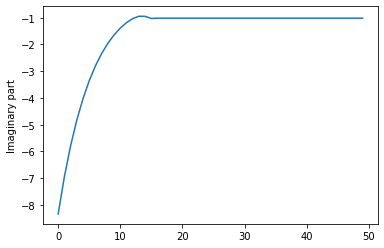

In [9]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print(r[-1], ' ',i[-1]) # raiz 5
plt.title('Newton iterates form z=-10.0 -10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z = 10.0 + 10.0j

0.5869924983526643   1.016700830808605


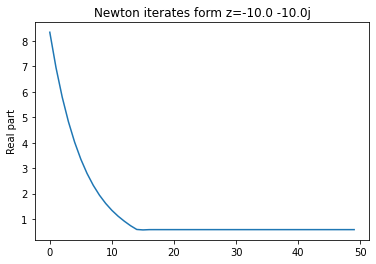

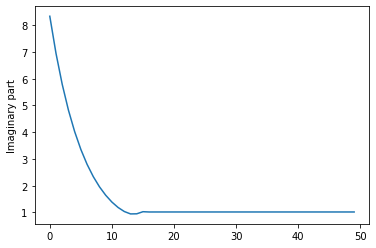

In [10]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print(r[-1], ' ',i[-1]) # raiz 6
plt.title('Newton iterates form z=-10.0 -10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()